# Visualizing Data

> To find signals in data, we must learn to reduce the noise - not just the noise that resides in the data, but also the noise that resides in us. It is nearly impossible for noisy minds to perceive anything but noise in data.
>
> \- Stephen Few, Data Visualization Consultant and Author

## Applied Review

### Joining Data

- *Joining* is the process of combining two DataFrames to form a new DataFrame that incorporates data from both of the combined tables.

- The most common type of join is an *inner join*, but full-outer, left-outer, and right-outer joins are all useful as well.

- Joins are done in Pandas with the `pd.merge` function.

### Exporting Data

- Most types of data in Python, including DataFrames and trained models, can be saved in files.

- The most common types of files for this are CSVs, JSON, and pickle files.

## Plotting Libraries

### Matplotlib

The tried-and-true, mature plotting library in Python is called Matplotlib.
It began with a mission of replicating Matlab's plotting functionality in Python, so if you're familiar with Matlab you may notice some syntactic similiaries.

Matplotlib is traditionally imported like this:
```python
import matplotlib.pyplot as plt
```
This means *import matplotlib's pyplot submodule under the name `plt`*.

For Matplotlib to work within Jupyter notebooks, we need to add an additional command:
```python
%matplotlib inline
```
This tells Jupyter to display any Matplotlib plots that are generated.
**Without this line, your plots won't show up -- Matplotlib creates them, but they never make it to your notebook.**

### Seaborn

While matplotlib is powerful and stable, the rise of Python's use within data science led to the development of a more data scientist-friendly library, called Seaborn.
Seaborn allows the user to describe graphics using clearer and less verbose function calls, but uses Matplotlib to generate the plots.
This approach has the added benefit of allowing the user to "drop down" to Matplotlib to make fine adjustments to his/her plots if needed.

Seaborn is traditionally imported like this:
```python
import seaborn as sns
```

Fun fact: *Seaborn is allegedly named after West Wing character Sam Seaborn, whose full name is Samuel Norman Seaborn (S.N.S. -- the package import nickname).*

In practice, a good strategy is to try to make your plots with Seaborn and switch to Matplotlib only when you discover you need more flexibility than Seaborn provides.

### Examples

The first things we need to do is import our libraries and tell Jupyter to show our plots

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Now let's import some data for plotting.

In [2]:
import pandas as pd
planes = pd.read_csv('../data/planes.csv')
flights = pd.read_csv('../data/flights.csv')

#### Distribution Plots
A very common need in data science is being able to see the distribution of a variable.
Histograms and density plots are two of the most frequently used options (box plots and violin plots can also be used).

Seaborn can create a distribution plot using the `distplot` function.

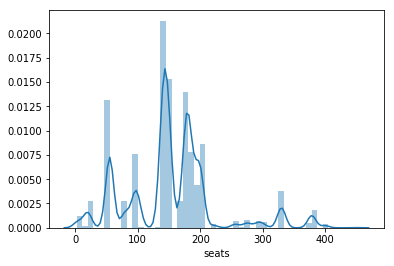

In [4]:
sns.distplot(planes['seats'])

You can see that the default plot overlays a density plot (the line) on a histogram (the bars).

You can hide one or the other by setting the `hist` or `kde` (kernel density estimate) argument to `False`.

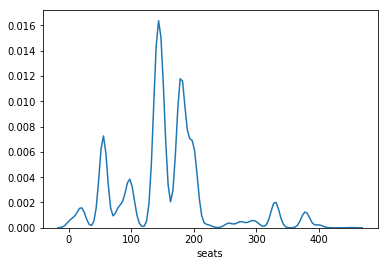

In [7]:
# Density plot only
sns.distplot(planes['seats'], hist=False)

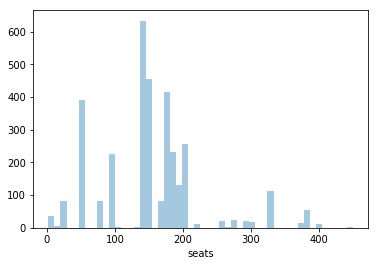

In [8]:
# Density plot only
sns.distplot(planes['seats'], kde=False)

`distplot`, like all Seaborn plotting functions, supports a wide variety of customizations using various arguments;
in today's training, we won't cover those, but refer to the [Seaborn docs](https://seaborn.pydata.org) to learn more.

#### Scatter Plots
Scatter plots are used to see the relationship between two variables.
They plot one variable on the x-axis and another on the y-axis, and use points to show where the records of the data occur.

Seaborn provides the `scatterplot` function for making scatterplots.
Simply pass in two columns of data –- the first will be your x-axis and the second your y-axis.

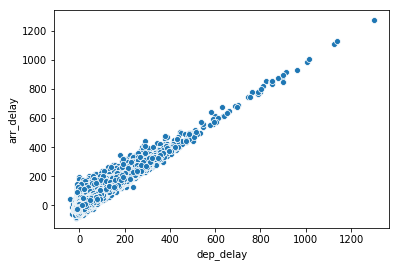

In [12]:
sns.scatterplot(flights['dep_delay'], flights['arr_delay'])

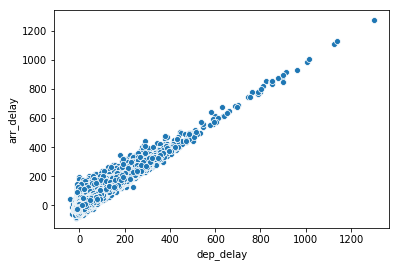

In [15]:
sns.scatterplot(flights['dep_delay'], flights['arr_delay'])

## Questions

Are there questions before we move on?